# SVM :- Forestfires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Check out the Data

In [2]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\SVM\forestfires.csv')
df.iloc[23:24,:]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
23,aug,sat,90.2,110.9,537.4,6.2,19.5,43.0,5.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,small


### EDA

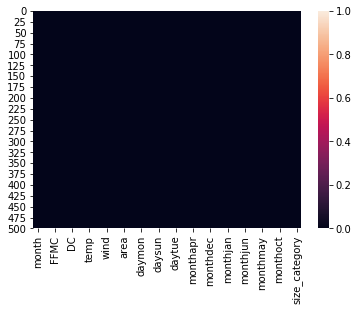

In [3]:
sns.heatmap(df.isnull())

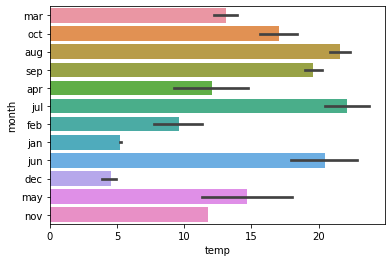

In [4]:
sns.barplot(x= df.temp,y=df.month,data=df)

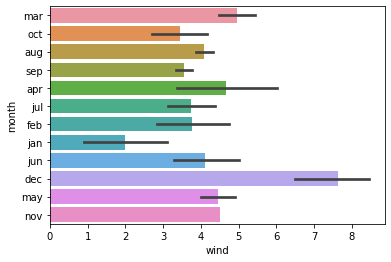

In [5]:
sns.barplot(x= df.wind,y=df.month,data=df)

(array([ 67.,  21.,   5.,  10.,  25.,  22.,  40., 136., 151.,  39.]),
 array([  7.9 ,  93.17, 178.44, 263.71, 348.98, 434.25, 519.52, 604.79,
        690.06, 775.33, 860.6 ]),
 <a list of 10 Patch objects>)

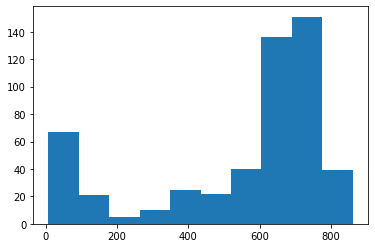

In [6]:
plt.hist(df.DC)

(array([ 20.,  40.,  85., 165.,  88.,  38.,  40.,  31.,   6.,   3.]),
 array([ 0.  ,  2.27,  4.54,  6.81,  9.08, 11.35, 13.62, 15.89, 18.16,
        20.43, 22.7 ]),
 <a list of 10 Patch objects>)

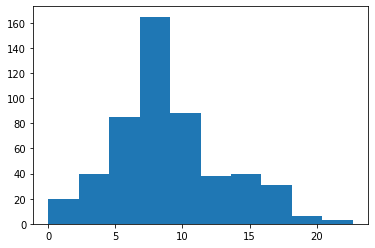

In [7]:
plt.hist(df.ISI)

In [8]:
df.value_counts('month')

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [10]:
df['y'] = lb.fit_transform(df['size_category'])


In [11]:
df = df.drop('day',axis=1)


In [12]:
df = df.drop('size_category',axis=1)

In [13]:
df = pd.get_dummies(df)

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('y',axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [16]:
from sklearn.svm import SVC
model = SVC()


In [17]:
model.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### GridSearch

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear', 'poly']} 


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

In [ ]:
print('Accurcy: ',np.mean(grid_predictions==y_test)*100)